In [13]:
import preprocessing




In [14]:
from textacy import preprocessing


In [15]:
!pip install nltk==3.6.7 contractions textacy wordcloud -q

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import contractions
import re #Regular Expressions
from textacy import preprocessing
from wordcloud import WordCloud
nltk.download('punkt', download_dir='.')
nltk.data.path.append('.')

[nltk_data] Downloading package punkt to ....
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
import pandas as pd


In [20]:
df=pd.read_csv('/content/FinalBalancedDataset.csv')

In [21]:
data=df['tweet']

In [22]:
data

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,"you've gone and broke the wrong heart baby, an..."
56742,young buck wanna eat!!.. dat nigguh like I ain...
56743,youu got wild bitches tellin you lies


In [23]:
stop_words=set(stopwords.words("english")) #stop words: which dont have any meaningful info eg:am, i, is
lemmatizer=WordNetLemmatizer()
def preprocess_tweets(text):
  text=contractions.fix(text)
  text=re.sub("http\S+", "", text)
  text=re.sub("\n","", text)
  text=preprocessing.normalize.unicode(text)
  text=preprocessing.normalize.whitespace(text)
  text=preprocessing.remove.accents(text)
  text=preprocessing.remove.brackets(text)
  text=preprocessing.remove.html_tags(text)
  text=preprocessing.remove.punctuation(text)
  text=preprocessing.replace.emails(text, "")
  text=preprocessing.replace.currency_symbols(text, "")
  text=preprocessing.replace.emojis(text, "")
  text=preprocessing.replace.hashtags(text, "")
  text=preprocessing.replace.numbers(text, "")
  text=preprocessing.replace.phone_numbers(text, "")
  text=preprocessing.replace.urls(text, "")
  text=preprocessing.replace.user_handles(text, "")
  text=text.lower()
  words=word_tokenize(text)
  words=[lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  return words

In [24]:

data=data.apply(preprocess_tweets)

In [25]:
sia=SentimentIntensityAnalyzer()
pos_tweets=[]
neg_tweets=[]
neu_tweets=[]
for word1 in data:
  word1=" ".join(word1)
  sentiment=sia.polarity_scores(word1)
  if sentiment['compound']>=0.05:
    pos_tweets.append(word1)
  elif sentiment['compound']<=-0.05:
    neg_tweets.append(word1)
  else:
    neu_tweets.append(word1)

In [26]:
pos_tweets

['user user thanks lyft credit use offer wheelchair van pdx disapointed getthanked',
 'model love take time areð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 'factsguide society motivation',
 'love land allin cavs champion cleveland clevelandcavaliers a\x80¦',
 'user user welcome gr8',
 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value love',
 'thankful paner thankful positive',
 'retweet agree',
 'friday ð\x9f\x98\x80 smile around via ig user user cooky make people',
 'euro2016 people blaming ha conceded goal fat rooney gave away free kick knowing bale hit',
 'product day happy man wine tool weekend time open drink',
 'user tgif ff gamedev indiedev indiegamedev squad user user user user user',
 'beautiful sign vendor upsideofflorida shopalyssas love',
 'user smile medium ð\x9f\x98\x9cð\x9f\x98\x88 pressconference antalya turkey sunday throwback love ð\x9f\x98\x8að\x9f\x98\x98a\x9di \x

In [27]:
pos_tweets_length=len(pos_tweets)
neg_tweets_length=len(neg_tweets)
neu_tweets_length=len(neu_tweets)

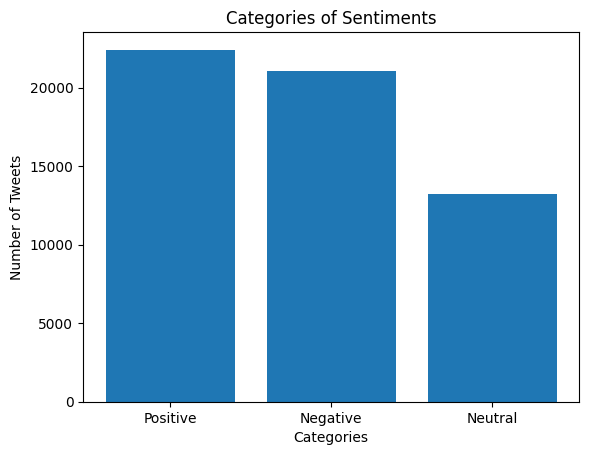

In [28]:
from matplotlib import pyplot as plt
values=[pos_tweets_length, neg_tweets_length, neu_tweets_length]
categories=['Positive', 'Negative', 'Neutral']
plt.bar(categories, values)
plt.title("Categories of Sentiments")
plt.xlabel('Categories')
plt.ylabel('Number of Tweets')
plt.savefig("Sentiment Classification")
plt.show()

In [29]:
pos_tweets="".join(pos_tweets)

In [30]:
print(pos_tweets)

user user thanks lyft credit use offer wheelchair van pdx disapointed getthankedmodel love take time areð± ðððð ð¦ð¦ð¦factsguide society motivationlove land allin cavs champion cleveland clevelandcavaliers a¦user user welcome gr8selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value lovethankful paner thankful positiveretweet agreefriday ð smile around via ig user user cooky make peopleeuro2016 people blaming ha conceded goal fat rooney gave away free kick knowing bale hitproduct day happy man wine tool weekend time open drinkuser tgif ff gamedev indiedev indiegamedev squad user user user user userbeautiful sign vendor upsideofflorida shopalyssas loveuser smile medium ðð pressconference antalya turkey sunday throwback love ððai great panel mediatization public service ica16happy father day user ððððpeople went nightclub good night man action mean people lost family forever rip orlandonever

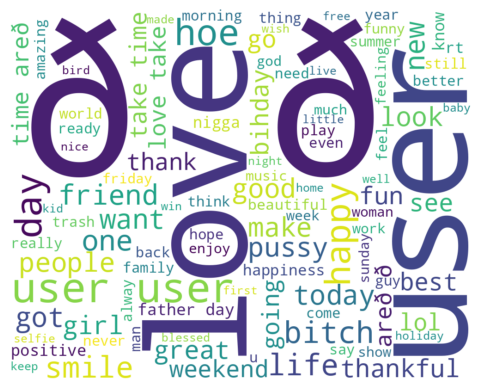

In [31]:
wordcloud1=WordCloud(background_color="white", width=1000, height=800, max_words=100).generate(pos_tweets)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.savefig("Positive Word Cloud.png")
plt.show()

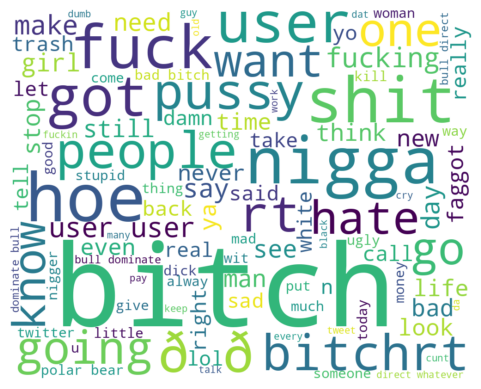

In [32]:
neg_tweets="".join(neg_tweets)
wordcloud2=WordCloud(background_color="white", width=1000, height=800, max_words=100).generate(neg_tweets)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.savefig("Negative Word Cloud.png")
plt.show()

In [33]:
#TF-IDF Vectorizer
#VADER Sentiment Analysis, BERT roBERTa
#Different Platforms, Youtube, Reddit, Facebook, Twitter, Threads